In [1]:
import seaborn as sb #for data visualisation
import matplotlib.pyplot as plt
import numpy as np #for operations on data
import pandas as pd #for loading dataset
from sklearn.impute import SimpleImputer #preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split #splitting dataset
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report,precision_score,f1_score

In [119]:
df=pd.read_csv("heart.csv")
df1 = df.copy(deep=True)

In [120]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [121]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [122]:
num_cols = df[["Age","RestingBP","Cholesterol","MaxHR","Oldpeak"]]
cat_cols = df[["Sex","ChestPainType","FastingBS","RestingECG","ExerciseAngina","ST_Slope","HeartDisease"]]

In [123]:
def outlier_analysis(f_q, t_q): 
    shape_first = num_cols.shape[0] # get initial no. of rows (row size,col size) 
    for col in num_cols: 
        Q1 = num_cols[col].quantile(f_q) # First Quartile 
        Q3 = num_cols[col].quantile(t_q) # Third Quartile 
        IQR = Q3 - Q1 # interquartile range 
        min_ = Q1 - 1.5 * IQR # for non-outliers Q1-1.5IQR<=X<=Q3+1.5IQR 
        max_ = Q3 + 1.5 * IQR 
        filter_ = (num_cols[col] < min_) | (num_cols[col] > max_) # get col withb corresponding bool
        if num_cols.loc[filter_].any(axis = None): # check for outlier in any row 
            cat_cols.drop(num_cols.loc[filter_].index, inplace=True) # .index retrieves row no. 
            num_cols.drop(num_cols.loc[filter_].index, inplace=True) # separately drop then combine
        else: 
            print(f"There is no outlier for {col} column.") 
    shape_last = num_cols.shape[0] 
    outlier_percentage = ((shape_first - shape_last) / shape_first) * 100 
    print("{:.2f}% observations have been dropped as outlier.".format(outlier_percentage)) 
outlier_analysis(0.2, 0.8) # we can customize the definition for quartiles 
df = pd.concat([num_cols,cat_cols], axis=1)

There is no outlier for Age column.
There is no outlier for MaxHR column.
1.96% observations have been dropped as outlier.


C:\Users\madha\AppData\Local\Temp\ipykernel_6756\3802304178.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_cols.drop(num_cols.loc[filter_].index, inplace=True) # .index retrieves row no.
C:\Users\madha\AppData\Local\Temp\ipykernel_6756\3802304178.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_cols.drop(num_cols.loc[filter_].index, inplace=True) # separately drop then combine


In [124]:
df.tail(5)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
913,45,110,264,132,1.2,M,TA,0,Normal,N,Flat,1
914,68,144,193,141,3.4,M,ASY,1,Normal,N,Flat,1
915,57,130,131,115,1.2,M,ASY,0,Normal,Y,Flat,1
916,57,130,236,174,0.0,F,ATA,0,LVH,N,Flat,1
917,38,138,175,173,0.0,M,NAP,0,Normal,N,Up,0


In [125]:
le = LabelEncoder() #Create object for class to access its functions
df['Sex'] = le.fit_transform(df['Sex'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope']=le.fit_transform(df['ST_Slope'])

In [126]:
df

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,40,140,289,172,0.0,1,1,0,1,0,2,0
1,49,160,180,156,1.0,0,2,0,1,0,1,1
2,37,130,283,98,0.0,1,1,0,2,0,2,0
3,48,138,214,108,1.5,0,0,0,1,1,1,1
4,54,150,195,122,0.0,1,2,0,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,132,1.2,1,3,0,1,0,1,1
914,68,144,193,141,3.4,1,0,1,1,0,1,1
915,57,130,131,115,1.2,1,0,0,1,1,1,1
916,57,130,236,174,0.0,0,1,0,0,0,1,1


In [127]:
a=df.corr()
a.style.background_gradient()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
Age,1.000000,0.270149,-0.088105,-0.390497,0.262052,0.066064,-0.080767,0.197525,-0.002335,0.214458,-0.269714,0.285072
RestingBP,0.270149,1.000000,0.108669,-0.106996,0.175383,0.017649,-0.003318,0.060508,0.037201,0.153644,-0.077101,0.097515
Cholesterol,-0.088105,0.108669,1.000000,0.240163,0.056779,-0.210079,0.072375,-0.277399,-0.193852,-0.027754,0.125250,-0.249533
MaxHR,-0.390497,-0.106996,0.240163,1.000000,-0.172081,-0.188599,0.294209,-0.128320,-0.171642,-0.375824,0.352337,-0.406278
Oldpeak,0.262052,0.175383,0.056779,-0.172081,1.000000,0.127245,-0.169715,0.056264,-0.011290,0.413579,-0.490972,0.412168
Sex,0.066064,0.017649,-0.210079,-0.188599,0.127245,1.000000,-0.129678,0.123190,0.062763,0.194826,-0.162527,0.309838
ChestPainType,-0.080767,-0.003318,0.072375,0.294209,-0.169715,-0.129678,1.000000,-0.073965,-0.076236,-0.348658,0.209362,-0.387570
FastingBS,0.197525,0.060508,-0.277399,-0.128320,0.056264,0.123190,-0.073965,1.000000,0.089990,0.056432,-0.174294,0.269013
RestingECG,-0.002335,0.037201,-0.193852,-0.171642,-0.011290,0.062763,-0.076236,0.089990,1.000000,0.078276,-0.015791,0.059509
ExerciseAngina,0.214458,0.153644,-0.027754,-0.375824,0.413579,0.194826,-0.348658,0.056432,0.078276,1.000000,-0.430468,0.499460


<AxesSubplot:>

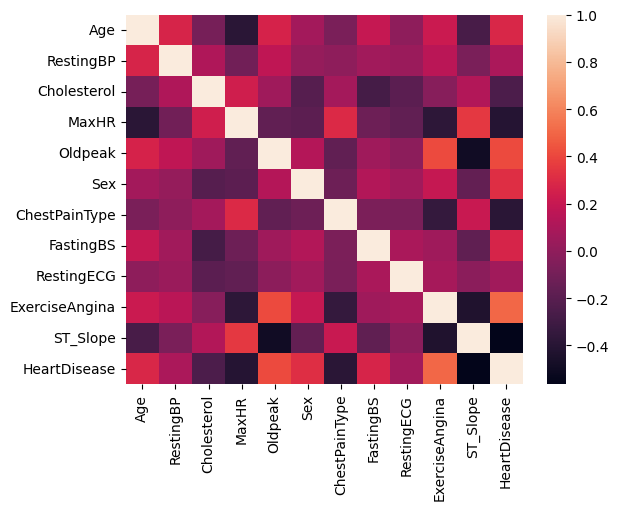

In [128]:
sb.heatmap(a)
# |values| near to zero in heatmap => features are hardly related in linear sense

In [129]:
x= df.iloc[:, [0,1,2,3,4,5,6,7,8,9,10]].values  
y= df.iloc[:, 11].values   
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.20, random_state=1) # 20% test       
st_x= StandardScaler() #create object 
y_t=y_train
x_train= st_x.fit_transform(x_train) #standardize by shifting mean and scaling SD   
x_test= st_x.transform(x_test)

In [130]:
pca=PCA(n_components=2)
pca.fit(x_train)

PCA(n_components=2)

In [131]:
x_pca=pca.transform(x_train)
x_t_pca=pca.transform(x_test)

In [132]:
x_pca.shape

(720, 2)

Text(0, 0.5, '2nd principle component')

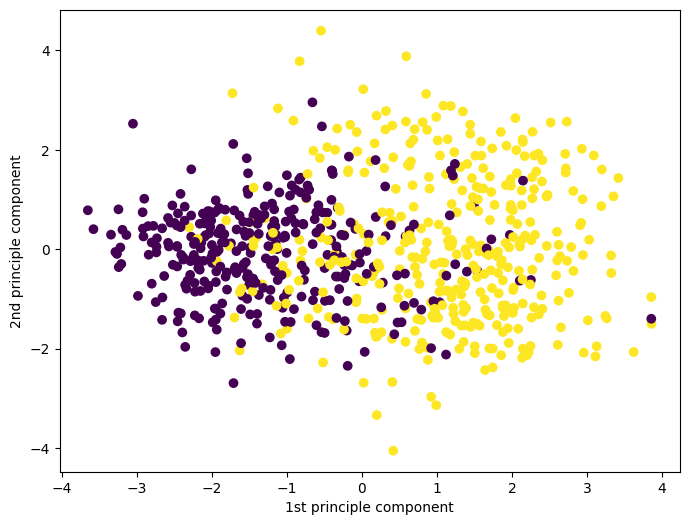

In [133]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_t)
plt.xlabel("1st principle component")
plt.ylabel("2nd principle component")

In [134]:
def model_train(model):
    model.fit(x_pca,y_train)
    y_pred=model.predict(x_t_pca)
    score = model.score(x_t_pca, y_test)
    print("accuracy ",score)
    print(classification_report(y_test,y_pred))
    print(plot_confusion_matrix(model,x_t_pca,y_test))
    print("precision ",precision_score(y_test, y_pred))
    print("f_score ",f1_score(y_test, y_pred))

accuracy  0.8444444444444444
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        76
           1       0.90      0.82      0.86       104

    accuracy                           0.84       180
   macro avg       0.84      0.85      0.84       180
weighted avg       0.85      0.84      0.85       180

precision  0.9042553191489362
f_score  0.8585858585858587


C:\Users\madha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


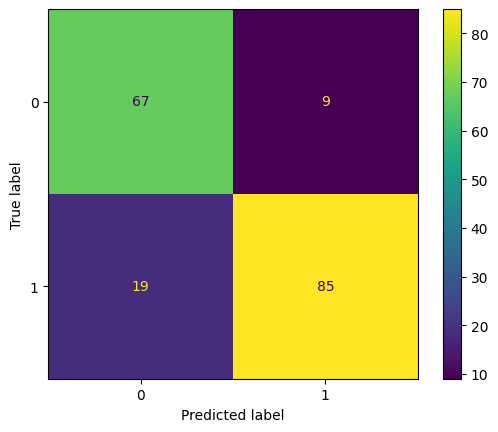

In [135]:
model_train(LogisticRegression())

In [136]:
X=x_pca
X

array([[ 1.32563565, -1.53332264],
       [-0.10682803,  0.51126067],
       [ 1.87683048, -1.17247034],
       ...,
       [-1.36806825,  0.68931928],
       [-1.45072816, -0.58966663],
       [-1.51903455,  1.52895312]])

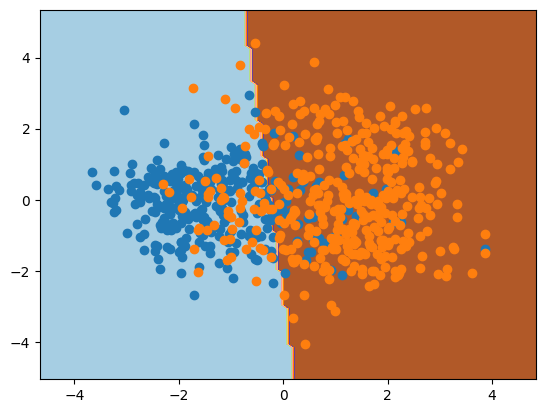

In [137]:
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y_train)
# make predictions for the grid
yhat = model.predict(grid)
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')
# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y_train == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')

In [142]:
df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,40,140,289,172,0.0,1,1,0,1,0,2,0
1,49,160,180,156,1.0,0,2,0,1,0,1,1
2,37,130,283,98,0.0,1,1,0,2,0,2,0
3,48,138,214,108,1.5,0,0,0,1,1,1,1
4,54,150,195,122,0.0,1,2,0,1,0,2,0


In [138]:
df.tail()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
913,45,110,264,132,1.2,1,3,0,1,0,1,1
914,68,144,193,141,3.4,1,0,1,1,0,1,1
915,57,130,131,115,1.2,1,0,0,1,1,1,1
916,57,130,236,174,0.0,0,1,0,0,0,1,1
917,38,138,175,173,0.0,1,2,0,1,0,2,0


In [148]:
df2 = pd.read_csv("inputdata.csv")
ipx= [df2.iloc[-1,:].values]
ipx_pca=pca.transform(ipx)
print(ipx_pca.shape)
model.predict(ipx_pca)

(1, 2)


array([0], dtype=int64)